# Εργασία 3

## Β. Ομαδοποίηση τύπων καρκίνου με βάση τα επίπεδα έκφρασης ακολουθιών RNA

### 1. Preprocessing

In [1]:
import urllib.request
import pandas as pd
import numpy as np
import tarfile
import os

np.random.seed(0)

folder = 'TCGA-PANCAN-HiSeq-801x20531'
filename = folder + '.tar.gz'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00401/' + filename
data_filename = os.path.join(folder, 'data.csv')
labels_filename = os.path.join(folder, 'labels.csv')

if not os.path.exists(data_filename) or not os.path.exists(labels_filename):
    print('Downloading file...')
    urllib.request.urlretrieve(url, filename)
    print('Done.')
    tar = tarfile.open(filename, "r:gz")
    tar.extractall()
    tar.close()
    
df_x = pd.read_csv(data_filename)
df_y = pd.read_csv(labels_filename)

In [2]:
df_x.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [3]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [4]:
df_x.drop(df_x.columns[0], axis=1, inplace=True)
df_x.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [5]:
df_y.drop(df_y.columns[0], axis=1, inplace=True)
df_y.head()

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA


<AxesSubplot:>

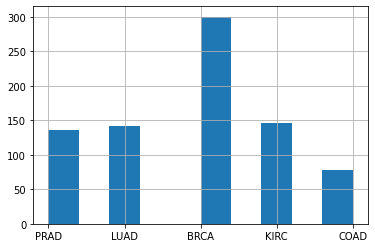

In [6]:
df_y = df_y['Class']
df_y.hist()

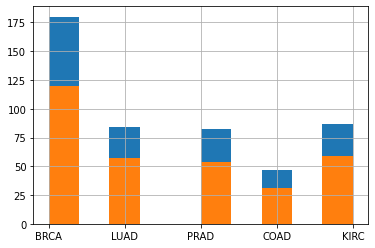

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=0)

for train_index, test_index in sss.split(df_x, df_y):
    df_train_x = df_x.loc[train_index]
    df_train_y = df_y.loc[train_index]
    df_test_x = df_x.loc[test_index]
    df_test_y = df_y.loc[test_index]
   
df_train_y.hist()
df_test_y.hist()
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

x_train = df_train_x.to_numpy()
y_train = df_train_y.to_numpy()
x_test = df_test_x.to_numpy()
y_test = df_test_y.to_numpy()

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)
print('x_test.shape =', x_test.shape)
print('y_test.shape =', y_test.shape)

x_train.shape = (480, 20531)
y_train.shape = (480,)
x_test.shape = (321, 20531)
y_test.shape = (321,)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### 2. Embedding

Ακολουθεί Spectral embedding το οποίο μετασχηματίζει τα δεδομένα σε χώρο δύο διαστάσεων.

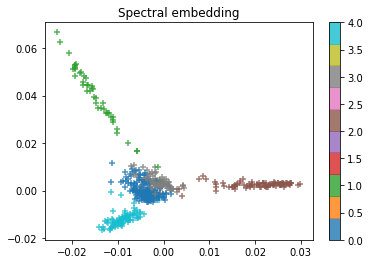

In [10]:
from sklearn.manifold import SpectralEmbedding

embedding = SpectralEmbedding(n_components=2, affinity='rbf', gamma=1e-4, random_state=0)
x_train_embedded = embedding.fit_transform(x_train)
plt.title('Spectral embedding')
plt.scatter(x_train_embedded[:, 0], x_train_embedded[:, 1],
            c=y_train, cmap='tab10', marker='+', alpha=0.8)
plt.colorbar() 
plt.show()

### 3. Algorithms

#### 3.1 MySpectralClustering

Ακολουθεί υλοποίηση Spectral Clustering. Αρχικά χτίζεται ο γράφος ομοιότητας με βάση τους k πλησιέστερους γείτονες. Απο αυτόν προκύπτει ο πίνακας γειτνίασης $G$. Αυτός ο πίνακας δεν είναι συμμετρικός γιατί αν ένα δείγμα Α έχει γείτονα το Β δεν σημαίνει ότι θα ισχύει και το αντίστροφο. Γίνεται συμμετρικός με τον ακόλουθο τύπο $S = \frac{1}{2} (G + G^T)$. Αυτός ο πίνακας είναι ο πίνακας ομοιότητας. Έπειτα πραγματοποιείται ιδιοανάλυση στον unnormalized και normalized laplacian matrix $L$. Τα ιδιοδιανύσματα αποτελούν τις στήλες του νέου πίνακα δειγμάτων τα οποία έχουν μετασχηματιστεί σε ένα νέο χώρο. Στο τέλος πραγματοποιείται clustering με k-means.

In [11]:
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans
import scipy
from scipy.linalg import eigh

class MySpectralClustering(object):
    def __init__(self, n_clusters=8, n_components=None, n_neighbors=10,
                 normed=True, random_state=None, n_jobs=None):
        self.n_clusters = n_clusters
        self.n_components = n_components
        self.n_neighbors = n_neighbors
        self.normed = normed
        self.random_state = random_state
        self.n_jobs = n_jobs
        self.lambdas = None
        
    def set_params(self, **params):
        if not params: return self
        self.n_clusters = params.get('n_clusters', self.n_clusters)
        self.n_components = params.get('n_clusters', self.n_components)
        self.n_neighbors = params.get('n_neighbors', self.n_neighbors)
        self.normed = params.get('normed', self.normed)
        self.random_state = params.get('random_state', self.random_state)
        self.n_jobs = params.get('n_jobs', self.n_jobs)
        return self
    
    def fit_predict(self, X):
        G = kneighbors_graph(X, n_neighbors=self.n_neighbors, n_jobs=self.n_jobs)
        G = G.toarray()
        S = 0.5*(G + G.T)
        L, d = scipy.sparse.csgraph.laplacian(S, normed=self.normed, return_diag=True)
            
        if self.n_components is None:
            self.n_components = self.n_clusters
        
        w, v = eigh(L)
        indices = np.argsort(w)
        w = w[indices]
        v = v[:, indices]
        v = v[:, :self.n_components]
        
        self.lambdas = w
        
        if self.normed:
            v /= np.sqrt(d).reshape(-1, 1)
        
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)
        labels = kmeans.fit_predict(v)
        
        return labels

### 4. Clustering

Εφαρμόζονται διάφοροι τύποι Spectral Clustering. Γίνεται ομαδοποίηση για n_clusters απο 2 έως 17. Για κάθε τιμή του n_clusters δίνονται διαγράμματα όπου φαίνονται οι διάφορες ομάδες που έχουν σχηματιστεί. Έπειτα δίνονται οι τιμές των Homogeneity, Completeness και V-measure. Η μετρική Homogeneity μας δείχνει κατά πόσο οι ομάδες περιέχουν δεδομένα τα οποία είναι μέλη μίας μόνο κλάσης. Η μετρική Completeness μας δείχνει κατά πόσο όλα τα δείγματα μιας ομάδας είναι μέλη της ίδιας κλάσης. Τέλος η μετρική V-measure είναι ο αρμονικός μέσος των Homogeneity και Completeness. Τα αποτελέσματα της ομαδοποίησης χρησιμοποιούνται για να γίνει κατηγοριοποίηση του test set με Nearest Class Centroid. Ως ετικέτα της ομάδας επιλέγεται η πιο συχνή ετικέτα. Μετά την κατηγοριοποίηση δίνονται οι μετρικές Accuracy, Precision, Recall, F1 και το Confusion Matrix.

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestCentroid
from sklearn.utils import shuffle
from time import time

all_results = {}

def do_the_clustering(clustering_str, clustering, X, y, verbose=0):
    all_n_clusters = range(2, 10)
    experiments_num = len(all_n_clusters)
    homogeneity = np.zeros(experiments_num)
    completeness = np.zeros(experiments_num)
    v_measure = np.zeros(experiments_num)
    times = np.zeros(experiments_num)
    accuracy = np.zeros(experiments_num)
    recall = np.zeros(experiments_num)
    precision = np.zeros(experiments_num)
    f1 = np.zeros(experiments_num)
    most_frequent_labels = []
    cm = None

    plt.subplots(4, 2, figsize=(15, 30))
    plt.subplots_adjust(hspace=0.3)
    
    for i, n_clusters in enumerate(all_n_clusters):
        clustering.set_params(n_clusters=n_clusters)
        t1 = time()
        y_pred = clustering.fit_predict(X)
        t2 = time()
        times[i] = t2 - t1
        homogeneity[i], completeness[i], v_measure[i] = homogeneity_completeness_v_measure(y, y_pred)        
        plt.subplot(4, 2, i+1)
        plt.title('n_clusters = {}'.format(n_clusters))
        plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='tab10', marker='+', alpha=0.8)
        plt.colorbar()
        if verbose > 0:
            print('n_clusters = {}, time = {:.1f} sec'.format(n_clusters, times[i]))
        
        y_train_new = np.copy(y_pred)       
        for label in range(n_clusters):
            indices = (y_pred == label)
            counts = np.bincount(y.astype(int)[indices])
            val = np.argmax(counts)
            y_train_new[indices] = val
        
        clf = NearestCentroid()
        clf.fit(x_train, y_train_new)
        y_pred_test = clf.predict(x_test)
        accuracy[i] = accuracy_score(y_test, y_pred_test)
        precision[i] = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
        recall[i] = recall_score(y_test, y_pred_test, average='weighted')
        f1[i] = f1_score(y_test, y_pred_test, average='weighted')
        
        if n_clusters == 5:
            cm = confusion_matrix(y_test, y_pred_test)
 
    plt.show()
    
    lambdas = clustering.lambdas[:20] if hasattr(clustering, 'lambdas') else None 
    
    results = {
        'all_n_clusters': all_n_clusters,
        'homogeneity': homogeneity,
        'completeness': completeness,
        'v_measure': v_measure,
        'times': times,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'times': times,
        'cm': cm,
        'most_frequent_labels': most_frequent_labels,
        'lambdas': lambdas
    }
    
    all_results[clustering_str] = results
        
    return results

In [13]:
def plot_clustering_results(results):
    all_n_clusters = results['all_n_clusters']
    homogeneity = results['homogeneity']
    completeness = results['completeness']
    v_measure = results['v_measure']
    times = results['times']
    
    plt.subplots(1, 2, figsize=(15, 5))
    plt.subplots_adjust(wspace=0.4)
    
    plt.subplot(1, 2, 1)
    plt.title('Clustering scores')
    plt.plot(all_n_clusters, homogeneity, label='Homogeneity')
    plt.plot(all_n_clusters, completeness, label='Completeness')
    plt.plot(all_n_clusters, v_measure, label='V-Measure')
    plt.ylabel('Score')
    plt.xlabel('n_clusters')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.title('Clustering time')
    plt.plot(all_n_clusters, times)
    plt.ylabel('Time (sec)')
    plt.xlabel('n_clusters')
    plt.show()

In [14]:
import seaborn as sns

def plot_classification_results(results):
    all_n_clusters = results['all_n_clusters']
    accuracy = results['accuracy']
    precision = results['precision']
    recall = results['recall']
    f1 = results['f1']
    cm = results['cm']
    
    plt.subplots(1, 2, figsize=(15, 5))
    plt.subplots_adjust(wspace=0.4)
    plt.subplot(1, 2, 1)
    plt.title('Classification scores')
    plt.plot(all_n_clusters, accuracy, label='Accuracy')
    plt.plot(all_n_clusters, precision, label='Precision')
    plt.plot(all_n_clusters, recall, label='Recall')
    plt.plot(all_n_clusters, f1, label='F1')
    plt.ylabel('Score')
    plt.xlabel('n_clusters')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.title('Confusion matrix for n_clusters = 5')
    sns.heatmap(cm, cmap="Oranges")
    plt.show()

In [15]:
def plot_eigvals(results):
    lambdas = results['lambdas']
    plt.title('Eigenvalues')
    plt.scatter(range(1, len(lambdas)+1), lambdas, marker='+')
    plt.show()

In [16]:
from IPython.display import display, HTML
import pandas as pd

def display_scores(results):
    all_n_clusters = results['all_n_clusters']
    homogeneity = results['homogeneity']
    completeness = results['completeness']
    v_measure = results['v_measure']
    accuracy = results['accuracy']
    precision = results['precision']
    recall = results['recall']
    f1 = results['f1']
    times = results['times']
    
    df = pd.DataFrame(list(zip(all_n_clusters, homogeneity, completeness, v_measure,
                           accuracy, precision, recall, f1, times)),
                  columns=('n_clusters', 'Homogeneity', 'Completeness', 'V-Measure',
                           'Accuracy', 'Precision', 'Recall', 'F1', 'Clustering Time (sec)'))
    display(HTML(df.to_html(index=False)))

In [17]:
def display_final_scores(all_results, n_clusters):
    homogeneity, completeness, v_measure = [], [], []
    accuracy, precision, recall, f1 = [], [], [], []
    times = []

    clustering_strs = [
        'My Unnormalized Spectral Clustering',
        'My Normalized Spectral Clustering',
        'Normalized Spectral Clustering',
    ]
    
    index = n_clusters-2

    for clustering_str in clustering_strs:
        results = all_results[clustering_str]
        homogeneity.append(results['homogeneity'][index])
        completeness.append(results['completeness'][index])
        v_measure.append(results['v_measure'][index])
        accuracy.append(results['accuracy'][index])
        precision.append(results['precision'][index])
        recall.append(results['recall'][index])
        f1.append(results['f1'][index])
        times.append(results['times'][index])

    df = pd.DataFrame(list(zip(clustering_strs, homogeneity, completeness, v_measure,
                           accuracy, precision, recall, f1, times)),
                  columns=('Clustering', 'Homogeneity', 'Completeness', 'V-Measure',
                           'Accuracy', 'Precision', 'Recall', 'F1', 'Clustering Time (sec)'))
    display(HTML(df.to_html(index=False)))

#### 4.1 My Unnormalized Spectral Clustering

Πραγματοποιείται ομαδοποίηση Spectral Clustering χρησιμοποιώντας τον unnormalized laplacian matrix.

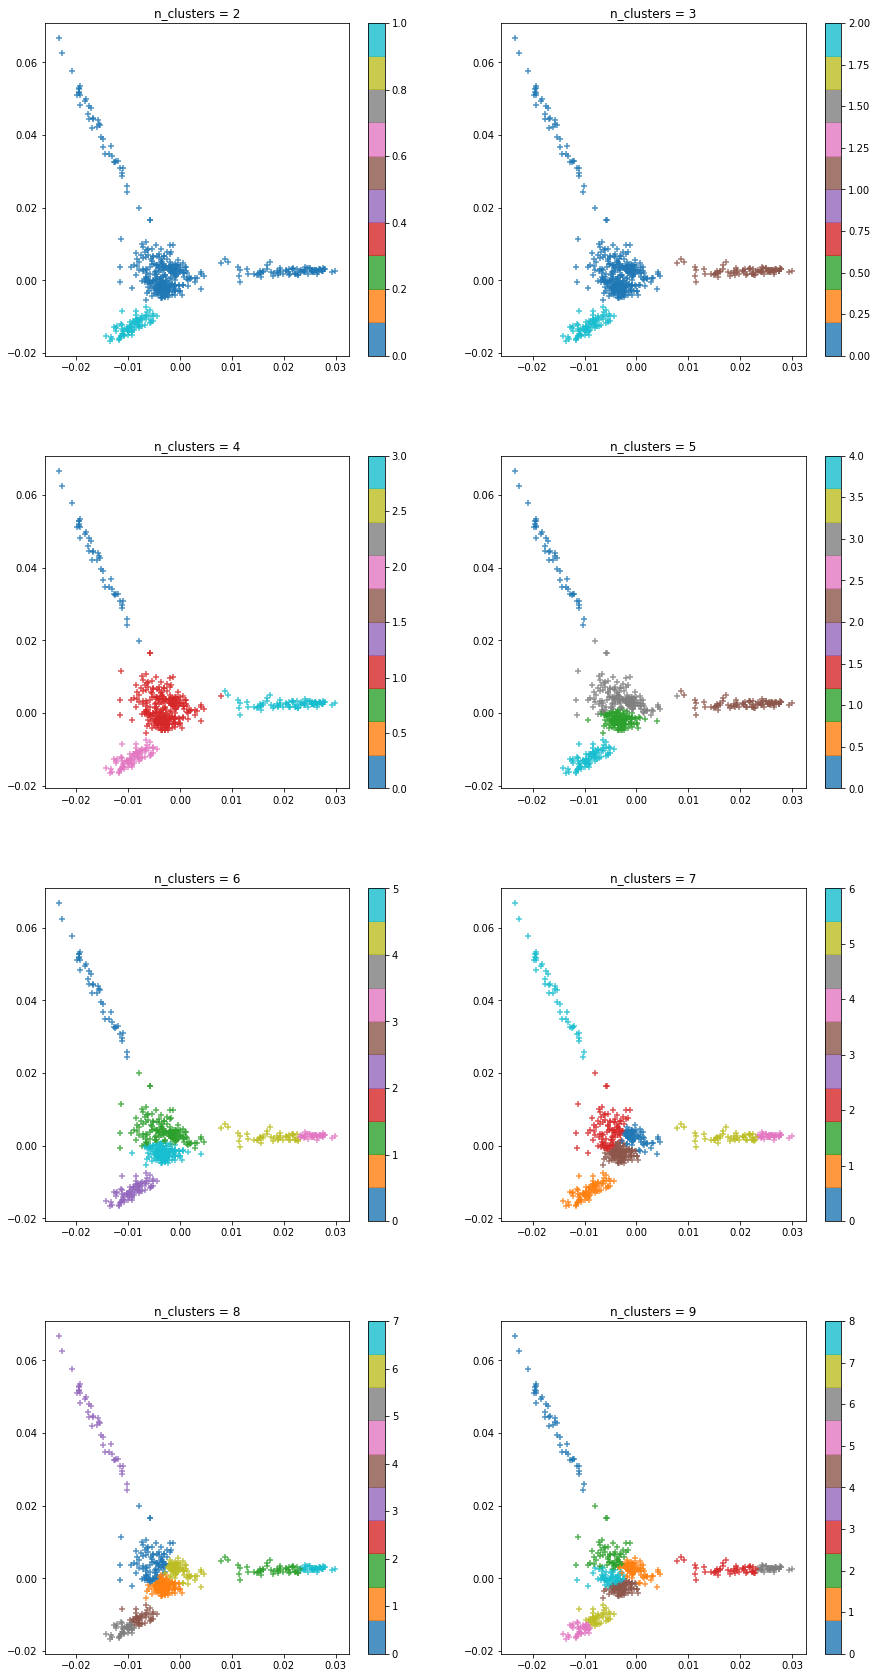

In [18]:
clustering = MySpectralClustering(n_neighbors=20, normed=False, random_state=0, n_jobs=-1)

results = do_the_clustering('My Unnormalized Spectral Clustering', clustering, x_train_embedded, y_train)

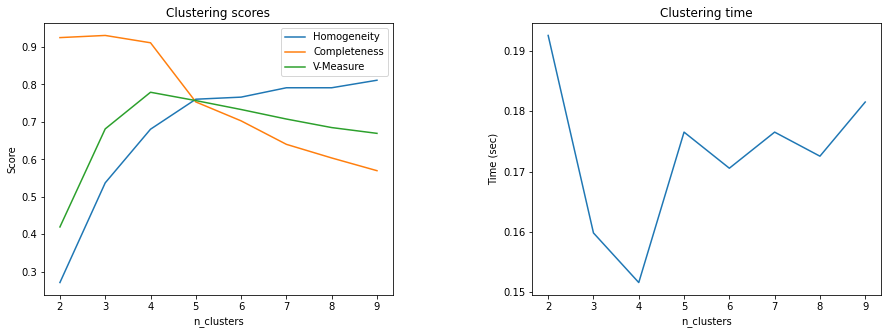

In [19]:
plot_clustering_results(results)

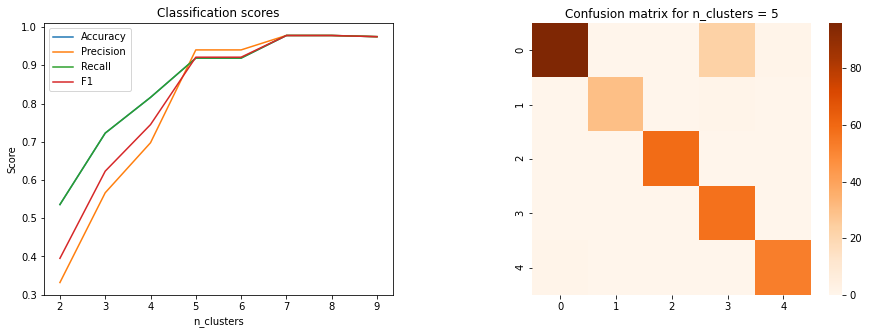

In [20]:
plot_classification_results(results)

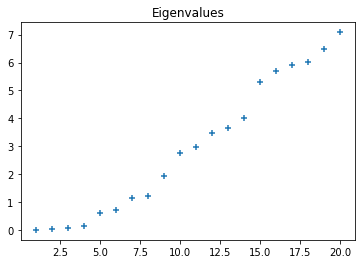

In [21]:
plot_eigvals(results)

In [22]:
display_scores(results)

n_clusters,Homogeneity,Completeness,V-Measure,Accuracy,Precision,Recall,F1,Clustering Time (sec)
2,0.271531,0.924972,0.419821,0.535826,0.331723,0.535826,0.395011,0.192552
3,0.537502,0.930723,0.681456,0.722741,0.566665,0.722741,0.623157,0.159816
4,0.680572,0.911189,0.779174,0.816199,0.697504,0.816199,0.744983,0.151594
5,0.760578,0.753357,0.756951,0.919003,0.940417,0.919003,0.921352,0.176528
6,0.766169,0.702880,0.733161,0.919003,0.940417,0.919003,0.921352,0.170544
7,0.791166,0.640224,0.707736,0.978193,0.978271,0.978193,0.978108,0.176528
8,0.791166,0.603884,0.684954,0.978193,0.978271,0.978193,0.978108,0.172539
9,0.811243,0.569952,0.669521,0.975078,0.975115,0.975078,0.975044,0.181515


#### 4.2 My Normalized Spectral Clustering

Πραγματοποιείται ομαδοποίηση Spectral Clustering χρησιμοποιώντας τον normalized laplacian matrix.

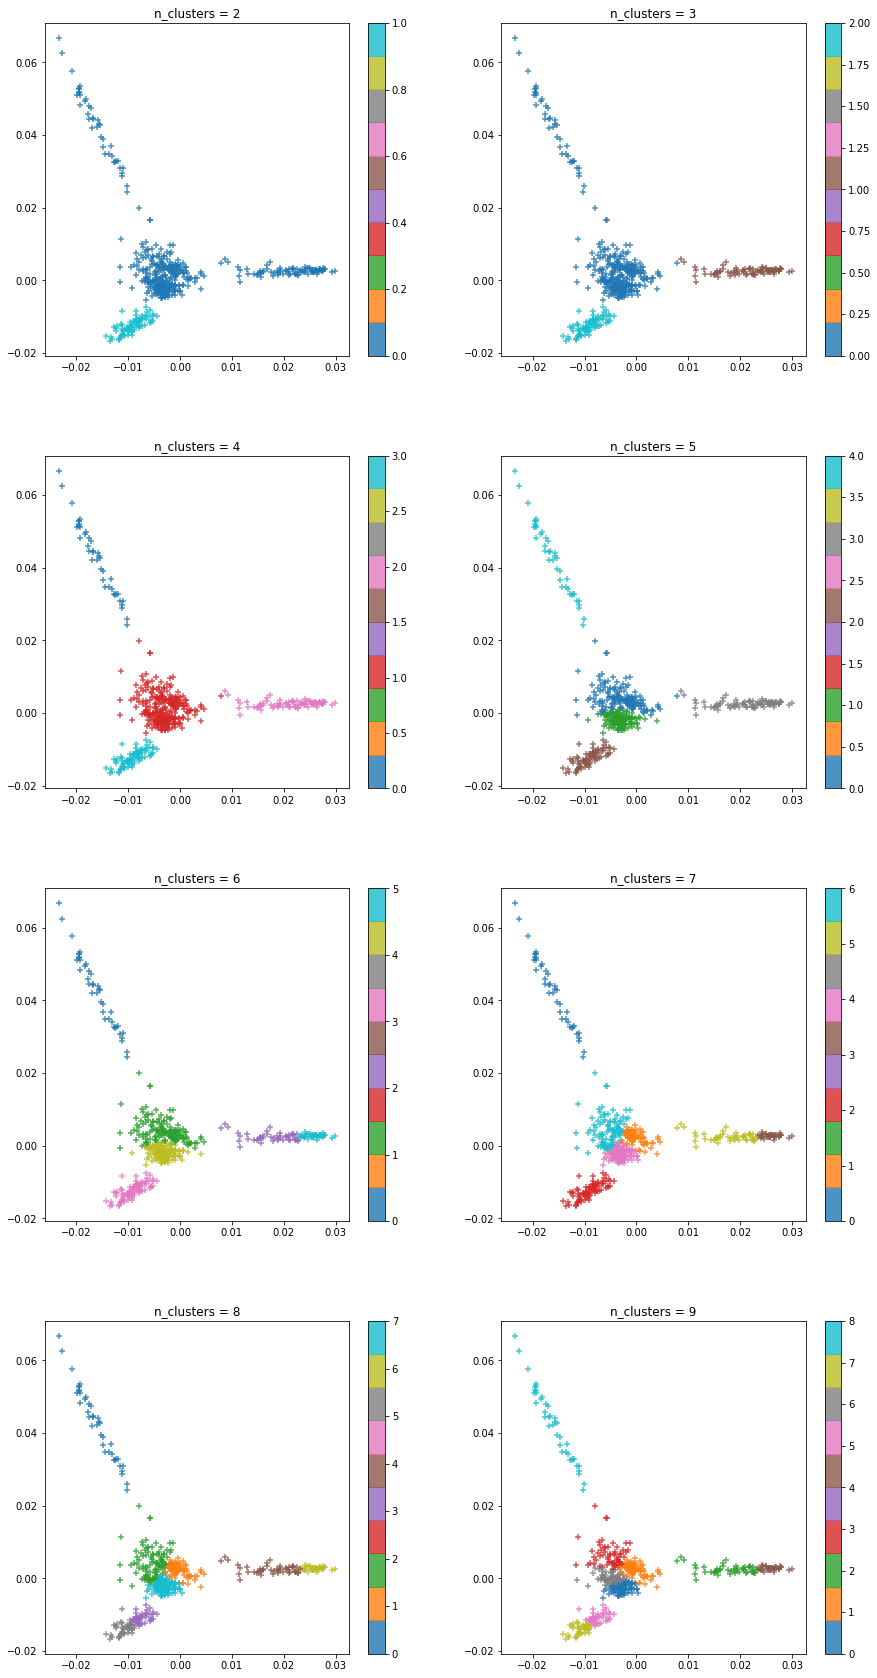

In [23]:
clustering = MySpectralClustering(n_neighbors=20, normed=True, random_state=0, n_jobs=-1)

results = do_the_clustering('My Normalized Spectral Clustering', clustering, x_train_embedded, y_train)

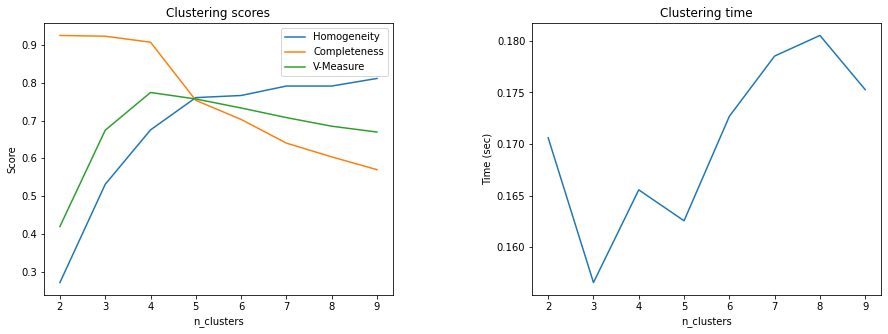

In [24]:
plot_clustering_results(results)

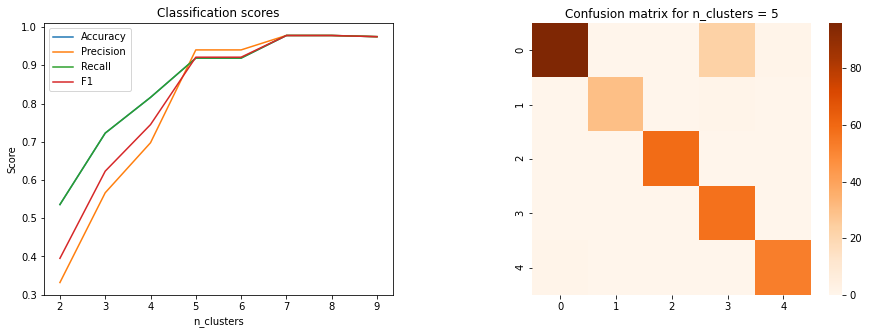

In [25]:
plot_classification_results(results)

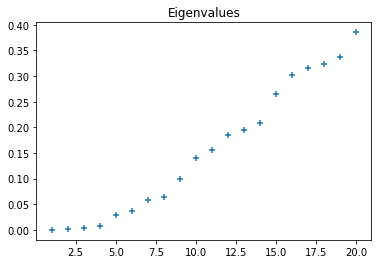

In [26]:
plot_eigvals(results)

In [27]:
display_scores(results)

n_clusters,Homogeneity,Completeness,V-Measure,Accuracy,Precision,Recall,F1,Clustering Time (sec)
2,0.271531,0.924972,0.419821,0.535826,0.331723,0.535826,0.395011,0.170604
3,0.531281,0.922899,0.674358,0.722741,0.566665,0.722741,0.623157,0.156581
4,0.675166,0.907132,0.774146,0.816199,0.697504,0.816199,0.744983,0.165558
5,0.760578,0.753357,0.756951,0.919003,0.940417,0.919003,0.921352,0.162566
6,0.766169,0.702880,0.733161,0.919003,0.940417,0.919003,0.921352,0.172681
7,0.791166,0.640224,0.707736,0.978193,0.978271,0.978193,0.978108,0.178523
8,0.791166,0.603884,0.684954,0.978193,0.978271,0.978193,0.978108,0.180518
9,0.811243,0.569952,0.669521,0.975078,0.975115,0.975078,0.975044,0.175267


#### 4.3 Normalized Spectral Clustering

Πραγματοποιείται ομαδοποίηση Spectral Clustering με τον αλγόριθμο sklearn.cluster.SpectralClustering ο οποίος χρησιμοποιεί τον normalized laplacian matrix.

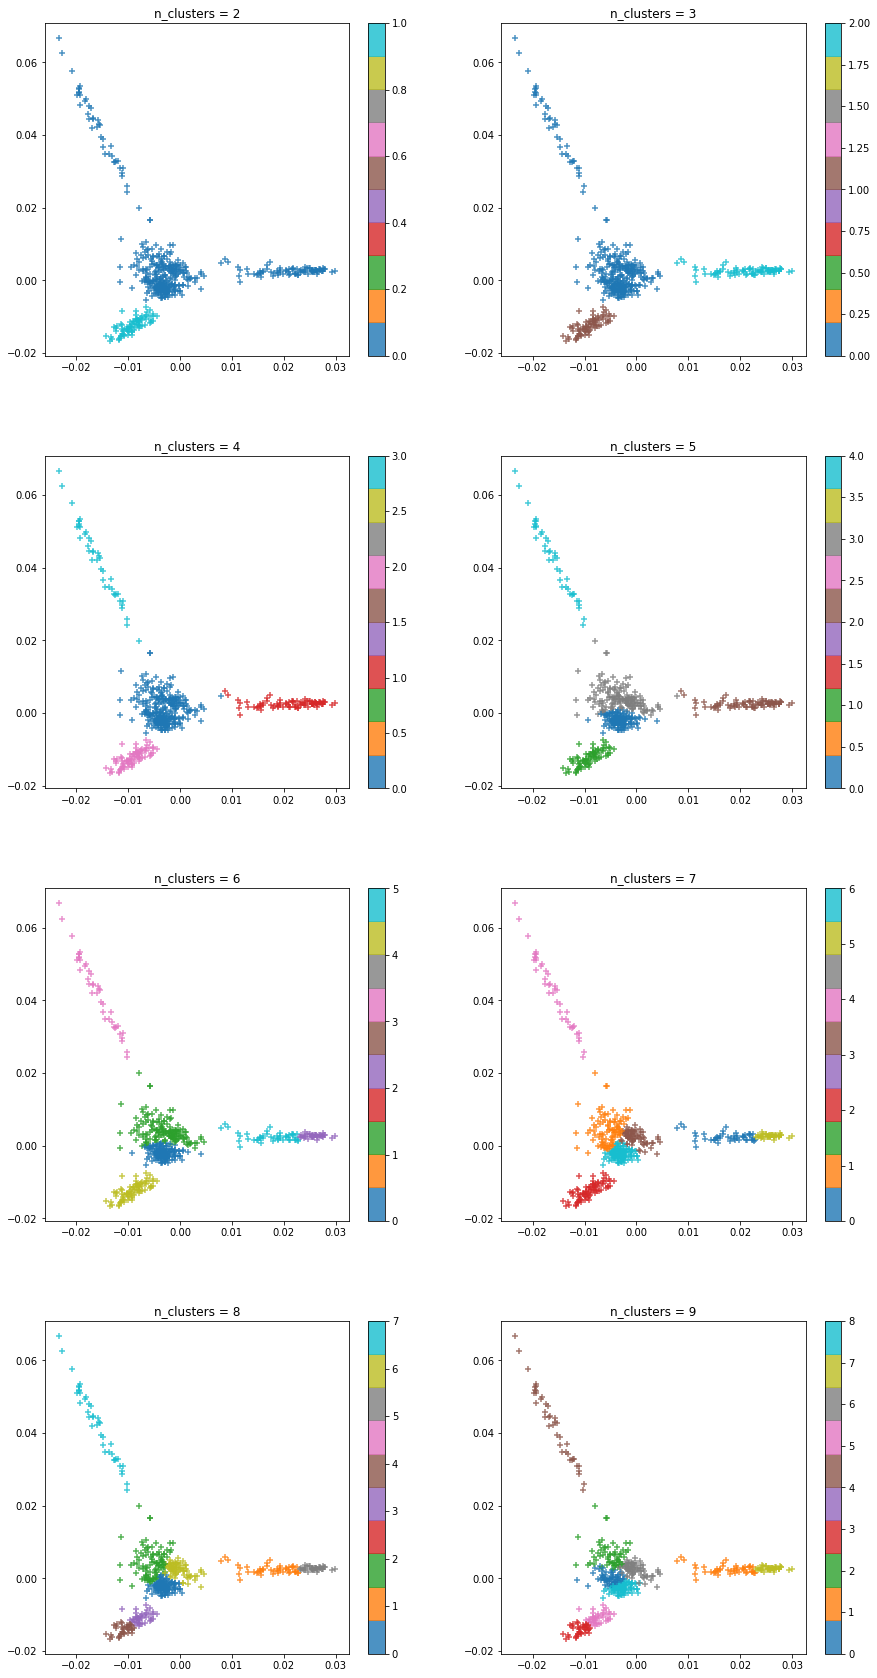

In [28]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(affinity='nearest_neighbors', n_neighbors=20, random_state=0, n_jobs=-1)

results = do_the_clustering('Normalized Spectral Clustering', clustering, x_train_embedded, y_train)

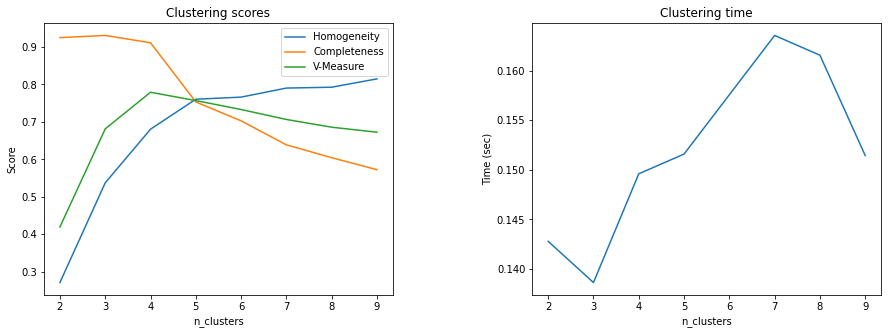

In [29]:
plot_clustering_results(results)

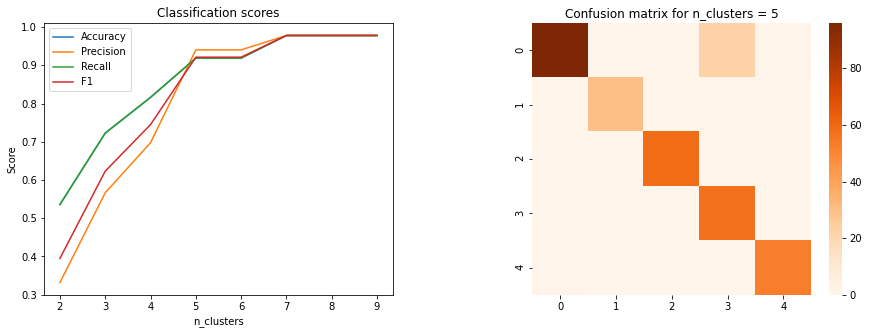

In [30]:
plot_classification_results(results)

In [31]:
display_scores(results)

n_clusters,Homogeneity,Completeness,V-Measure,Accuracy,Precision,Recall,F1,Clustering Time (sec)
2,0.271531,0.924972,0.419821,0.535826,0.331723,0.535826,0.395011,0.142786
3,0.537502,0.930723,0.681456,0.722741,0.566665,0.722741,0.623157,0.138630
4,0.680572,0.911189,0.779174,0.816199,0.697504,0.816199,0.744983,0.149601
5,0.760578,0.753357,0.756951,0.919003,0.940417,0.919003,0.921352,0.151595
6,0.766169,0.702880,0.733161,0.919003,0.940417,0.919003,0.921352,0.157578
7,0.790331,0.638868,0.706573,0.978193,0.978103,0.978193,0.978129,0.163563
8,0.792610,0.604606,0.685960,0.978193,0.978271,0.978193,0.978108,0.161568
9,0.814882,0.572538,0.672544,0.978193,0.978271,0.978193,0.978108,0.151443


### 5. Σύγκριση αποτελεσμάτων για n_clusters = 5

Ακολουθεί συνοπτικός πίνακας των clustering και classification scores για n_clusters = 5.

In [32]:
display_final_scores(all_results, n_clusters=5)

Clustering,Homogeneity,Completeness,V-Measure,Accuracy,Precision,Recall,F1,Clustering Time (sec)
My Unnormalized Spectral Clustering,0.760578,0.753357,0.756951,0.919003,0.940417,0.919003,0.921352,0.176528
My Normalized Spectral Clustering,0.760578,0.753357,0.756951,0.919003,0.940417,0.919003,0.921352,0.162566
Normalized Spectral Clustering,0.760578,0.753357,0.756951,0.919003,0.940417,0.919003,0.921352,0.151595
